<img src="Figures/logo_trans.png" width="180px" alt="LyonHPC" />
<img width="200px" src="Figures/python-logo.gif" alt="LyonHPC"/>

# Programmation structurée

<img src="Figures/cloud_fonction.png" alt="cloud" width="300px"/>

In [1]:
%matplotlib inline
import numpy as np
from IPython.display import HTML,display,IFrame,Video
from IPython.display import YouTubeVideo,Markdown

```{tip} 
pour tester les programmes Python, vous pouvez vous connectez sur un serveur Jupyter, par exemple, pour 
les étudiants Lyon1 [https://jupyter.mecanique.univ-lyon1.fr](https://jupyter.mecanique.univ-lyon1.fr)
```

## Programmation structurée

En Informatique il existe différentes méthodes de programmation ou paradigmes de programmation (programmation structurée, programmation orientée objects, programmation fonctionnelle...). Parmi ces paradigmes, la programmation structurée est une méthode simple et  disponible dans de nombreux langages de programmation scientifique (Python, C, C++, ..). Le principe de base est le suivant: 

>**principe:** `Divide and Conquer`

qui consiste à découper le problème en une suite de problèmes plus simples

### Analyse algorithmique "Top-Down design"

<img width="500px" src="Figures/analyse_topdown.png" alt="Analyse" />

### Principes de l'analyse top down

- on découpe le problème en une série de sous-problèmes plus simples (si possible indépendant)
- on spécifie ce qui doit résolu dans chacun des sous-problèmes sans forcément dire comment
- puis on itère au niveau des sous problèmes.

### Programmation "Botton-up programming"

- on part des sous-problèmes élémentaires que l'on programme sous forme de fonctions (ou procédures)
- on valide les fonctions
- puis on réitère en remontant dans l'arbre jusqu'au programme principal

**règles** réutiliser les fonctions déjà écrites et validées (bibliothèques): *principe du moindre effort !*


## Exemple: simuler l'alunissage de Neil Amstrong (Apollo 11)

- basé sur une simulation d'alunissage du module lunaire écrit en basic en 1969, puis popularisé en 1979 sur ATARI (Lunar Lander).

<img width="300px" src="Figures/Moon_Lander_v2.png" alt="Moon Lander" />


In [2]:
display(Markdown("**Video du cours: Programmation structurée sur un exemple 'Lunar Lander'**"))
YouTubeVideo('7QGM_BtCxRE')

**Video du cours: Programmation structurée sur un exemple 'Lunar Lander'**

```{attention} 
Les vidéos utilisent un ancien interpréteur python 2.7, pour lequel `print` est un mot clé, 
soit `print 'bonjour'`.
Avec Python 3, `print` est une fonction et il faut donc utiliser des parenthèses, 
soit `print('bonjour')` 
```


### jeu "Lunar Lander"

Poser le module lunaire (LEM) sur la lune en arrivant avec une vitesse quasiment nulle. Pour cela on dispose de rétro-fusées permettant de ralentir la chute du LEM. 

- On contrôle manuellement ces rétro-fusées en sélectionnant une poussée (de 0 à 9), correspondant à l'éjection de carburant avec un débit $Qe$ variable et une vitesse $Ue$ fixe. 
- Mais on dispose d'une quantité limitée de carburant que l'on doit utiliser avec modération pour pouvoir atterrir en douceur.

#### modèle physique:
Le LEM, de masse initiale $M0$, est soumis à la gravité $g$ de la lune et à la poussée des rétro-fusées, correspondant à l'éjection d'un débit de fuel $Qe$ à un vitesse $Ve$ . 

<img style=" float:center; display:inline; width:450px;" src="Figures/LEM.png" alt="LEM" />

#### modèle mathématique:
Equation du mouvement:

$$ \frac{d^2 Z}{dt^2} = -g + \frac{Qe*Ue}{M0-Qe*t}$$

en intégrant sur la durée d'une commande $T$ $\rightarrow$ vitesse $V$

$$ V = V0 + g*T + Ue * \ln{(1 - \frac{Qe*T}{M0})} $$

La masse du LEM $M$ diminue 

$$M = M0 -Qe*T$$

Approximation par DL car $X=\frac{Qe*T}{M0} \ll 1$

$$ V = V0 + g*T - Ue*(X + \frac{X^2}{2} + \frac{X^3}{3}  + \frac{X^4}{4} + \frac{X^5}{5})$$
d'où l'altitude $Z$

$$ Z = Z0 - V0*T - g \frac{T^2}{2} + Ue*T*(\frac{X}{2} + \frac{X^2}{6} + \frac{X^3}{12}  + \frac{X^4}{20} + \frac{X^5}{30})$$

expression utilisée dans les premiers programmes en BASIC.

#### cas particuliers

1. Si le fuel est épuisé ($Qe=0$), le LEM atteins la surface lunaire au bout d'un temps $T$ solution de l'équation du 2nd degré:

$$ 0 = Z0 - V0*T -g \frac{T^2}{2}$$

soit $T = (-V0 + \sqrt{V0^2 + 2 g Z0})/g$

2. Près de la surface,  $T$ trop grand $\rightarrow$ prédiction $Z0 < 0$
   - calcul  $T$ donnant l'altitude $Z=0$, solution d'une équation du 6ième degré. 
   - calcul par approximations successives en utilisant un DL de $Z(t)$ 
     1. estimation $T0$ de $T$
     
     $$ T0 = \frac{-V0 + \sqrt{V0^2 + 2 (g-\frac{Ue*Qe}{M0}) Z0}}{g-\frac{Ue*Qe}{M0}} $$
     
     2. recalcule $V0$ et $Z0$, puis recommence.

### Algorithme: analyse top-down

#### problème global

<img width="450px" src="Figures/Algorithme1.png" alt="Algorithme" />

#### sous-probleme Lecture_cde

<img width="450px" src="Figures/Algorithme2.png" alt="Algorithme" />

#### sous-problème VitesseAltitude

applications des formules mathématiques de l'analyse précédente

$$ V = V0 + g*T - Ue*(X + \frac{X^2}{2} + \frac{X^3}{3}  + \frac{X^4}{4} + \frac{X^5}{5})$$
$$ Z = Z0 - V0*T - g \frac{T^2}{2} + Ue*T*(\frac{X}{2} + \frac{X^2}{6} + \frac{X^3}{12}  + \frac{X^4}{20} + \frac{X^5}{30})$$

#### sous-probleme Alunissage

<img width="450px" src="Figures/Algorithme3.png" alt="Algorithme" />

### Programmation Python bottom up
#### Fonction Lecture_Cde

In [7]:
import numpy as np
from random import sample
import sys
# constantes en unité SI (kg/m/s)
g  = 1.6     # gravité
Ue = 2900.   # vitesse d'ejection
# 
def Lecture_Cde(Me,dt):
    """ lecture de la commande (poussée) avec test carburant """
    T=dt
    if Me>0 :
        # lecture poussee
        # lecture clavier
        # ch = input("Entrez la valeur de la poussée (0-100) (en kg/s) = ")[0]
        # Qe = int(ch)
        # lecture aleatoire
        Qe = np.random.randint(100)
        # test si reserve de fuel suffisante
        if (Me-Qe*T)<0 :
            # temps restant d'utilisation du fuel
            T = Me/Qe
    else:
        print("Plus de fuel ")
        Qe = 0
        # calcul du temps T pour parcourir Z0 (alunissage)
        T = (-V0 + np.sqrt(V0*V0 + 2*g*Z0)) / g
    return Qe,T

#### Fonction VitesseAltitude

In [8]:
def VitesseAltitude(v0,Z0,X,T):
    """ calcul de la nvlle vitesse en fonction de la vitesse init V0
        un débit sans dimension X=Qe*T/M0 de fuel, pendant un temps T
        ainsi que de la nouvelle altitude du LEM
    """
    global g,Ue
    V = V0 + g*T - Ue*(X + X*X/2. + X**3/3. + X**4/4. + X**5/5.)
    Z = Z0 - V0*T - g*T*T/2. + Ue*T*(X/2. + X*X/6. + X**3/12. + X**4/20. + X**5/30.)
    return V,Z

#### Fonction Alunissage

In [9]:
def Alunissage(V0,Z0,M0,Qe):
    """ calcul etat a Z=0 a partir d'une CI V0,Z0,M0 et une poussée Qe """
    global g,Ue
    # calcul du temps T pour alunissage par approximation successive
    T0 = 0
    while np.abs(Z0) > 1.e-2:
            T= (-V0 + np.sqrt(V0*V0 + 2*(g-Ue*Qe/M0)*Z0)) / (g-Ue*Qe/M0)
            V0,Z0 = VitesseAltitude(V0,Z0,Qe*T/M0,T)
            T0 = T0+ T
    return V0,Z0,T0

#### Programme principal

In [10]:
# conditions initiales
Z0 = 190000. # position
V0 = 1580.   # et vitesse
M0 = 15000.  # masse initiale du LEM
Me = 8000.   # dont une masse de fuel
t  = 0.      # temps simulation
dt = 10.     # pas en temps entre chaque commande
#
print("Simulation alunissage")
while np.abs(Z0)>1.e-2 :
    Qe,T = Lecture_Cde(Me,dt)
    # calcul de la nouvelle position du LEM
    V1,Z1 = VitesseAltitude(V0,Z0,Qe*T/M0,T)
    # test si alunnissage
    if Z1 < 1.e-2 :
        V1,Z1,T = Alunissage(V0,Z0,M0,Qe)
    # mise a jour de la position du LEM
    Z0 = Z1;      V0 = V1
    Me = Me-Qe*T; M0 = M0-Qe*T
    t  = t + T
    print("t=",int(t),"s Z=",int(Z0),"m V=",int(V0),"m/s fuel=",int(Me),"kg")
# fin simulation
print("Alunissage avec une vitesse ",int(V0)," m/s")
if V0<=0.5 :
    print("Alunissage parfait")
elif V0<=5. :
    print("Bon alunissage, mais perfectible")
elif V0<=27.:
    print("Accident à l'alunissage. Attendez les secours en esperant que vous avez assez d'oxygene !!!")
else :
    print("Crash fatal: aucun survivant")

Simulation alunissage
t= 10 s Z= 174480 m V= 1523 m/s fuel= 7630 kg
t= 20 s Z= 159747 m V= 1422 m/s fuel= 7050 kg
t= 30 s Z= 145444 m V= 1438 m/s fuel= 7050 kg
t= 40 s Z= 131346 m V= 1381 m/s fuel= 6700 kg
t= 50 s Z= 117969 m V= 1293 m/s fuel= 6220 kg
t= 60 s Z= 105598 m V= 1179 m/s fuel= 5640 kg
t= 70 s Z= 93988 m V= 1142 m/s fuel= 5410 kg
t= 80 s Z= 82910 m V= 1072 m/s fuel= 5050 kg
t= 90 s Z= 72959 m V= 915 m/s fuel= 4350 kg
t= 100 s Z= 64073 m V= 861 m/s fuel= 4080 kg
t= 110 s Z= 56533 m V= 643 m/s fuel= 3220 kg
t= 120 s Z= 50422 m V= 578 m/s fuel= 2940 kg
t= 130 s Z= 44789 m V= 547 m/s fuel= 2780 kg
t= 140 s Z= 40110 m V= 386 m/s fuel= 2200 kg
t= 150 s Z= 36309 m V= 373 m/s fuel= 2110 kg
t= 160 s Z= 33601 m V= 164 m/s fuel= 1430 kg
t= 170 s Z= 33534 m V= -158 m/s fuel= 500 kg
t= 178 s Z= 35555 m V= -345 m/s fuel= 0 kg
Plus de fuel 
t= 695 s Z= 0 m V= 482 m/s fuel= 0 kg
Alunissage avec une vitesse  482  m/s
Crash fatal: aucun survivant


## Exercice: simulation d'un lancer de balle

ou comment programmer le célébre jeux HUNGRY BIRD !

<img width="300px" src="Figures/angry-birds.jpg" alt="Angry-Birds" />


**Video du cours: Exercice 'Lancer de balle'**

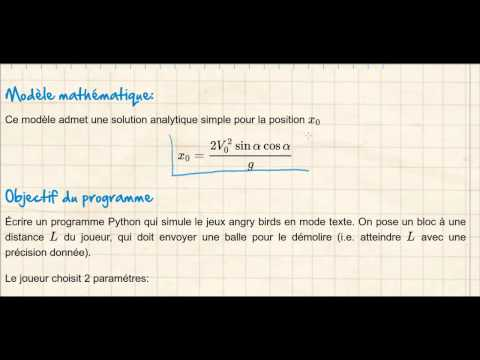

In [51]:
display(Markdown("**Video du cours: Exercice 'Lancer de balle'**"))
YouTubeVideo('QazORncfuIM')

### Modèle physique:

<img style=" float:center; display:inline; width:520px;" src="Figures/lancer_balle.png" alt="Algorithme" />

### Modèle mathématique:

Ce modèle admet une solution analytique simple pour la position $x_0$

$$ x_0 = \frac{ 2 V_0^2 \sin{\alpha} \cos{\alpha}}{g} $$

### Objectif du programme

Écrire un programme Python qui simule le jeux angry birds en mode texte. On pose un bloc à une distance $L$ du joueur, qui doit envoyer une balle pour le démolir (i.e. atteindre $L$ avec une précision donnée).

Le joueur choisit 2 paramètres à valeurs discrètes:

- l'angle $\alpha$ (de 1 à 8 pour un angle de 10 à 45 degré par pas de 5)
- la vitesse initiale $V_0$ (de 1 à 5 par pas 1).

Le joueur a 3 essais, et pour chaque essai, le programme indique la distance atteinte par la balle par rapport au bloc visé.

## Bibliographie

1. Programme originel "Lunar Lander" en Basic sur ATARI:

   - ["Lunar Lander basic programme"](http://atariarchives.org/basicgames/showpage.php?page=106)

2. La programmation structurée (voir aussi l'article fondateur de [Dijkstra](https://fr.wikipedia.org/wiki/Edsger_Dijkstra)) 

   - [programmation structurée sur Wikipédia](https://fr.wikipedia.org/wiki/Programmation_structur%C3%A9e)


## Fin de la leçon

<img src="Figures/cloud_fonction.png" alt="cloud" width="300px"/>